In [1]:

import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

from keras import Sequential


from keras.callbacks import ReduceLROnPlateau
from keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, RMSprop, Nadam
from tensorflow.keras import models, layers, regularizers
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import Xception
from tensorflow.keras.layers import Input,Flatten,Dense,BatchNormalization,Activation,Dropout,GlobalAveragePooling2D,MaxPooling2D,RandomFlip,RandomZoom,RandomRotation
   

2023-03-19 13:11:38.601561: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


x_train, x_test = x_train / 255., x_test / 255.

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print((x_train.shape, y_train.shape))
print((x_test.shape, y_test.shape))

((50000, 32, 32, 3), (50000, 10))
((10000, 32, 32, 3), (10000, 10))


In [9]:
base_model = Xception(include_top=False, weights='imagenet', input_shape=(224,224,3), classes=y_train.shape[1])


In [11]:
data_add = Sequential(
    [RandomFlip("horizontal"), 
     RandomRotation(0.1),
     RandomZoom(0.1)])



In [13]:
inputs = tf.keras.Input(shape=(32, 32, 3))
x = tf.keras.layers.Lambda(lambda image: tf.image.resize(image, (224,224)))(inputs)
x = data_add(x)
x = tf.keras.applications.xception.preprocess_input(x)
x = base_model(x, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.3)(x)
outputs = tf.keras.layers.Dense(10, activation=('softmax'))(x)
model = tf.keras.Model(inputs, outputs)
     

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 lambda_2 (Lambda)           (None, 224, 224, 3)       0         
                                                                 
 sequential_3 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 tf.math.truediv_1 (TFOpLamb  (None, 224, 224, 3)      0         
 da)                                                             
                                                                 
 tf.math.subtract_1 (TFOpLam  (None, 224, 224, 3)      0         
 bda)                                                            
                                                                 
 xception (Functional)       (None, 7, 7, 2048)        2086

In [15]:
model.compile(
    loss="binary_crossentropy",
    optimizer='adam',
    metrics=["accuracy"]
)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 lambda_2 (Lambda)           (None, 224, 224, 3)       0         
                                                                 
 sequential_3 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 tf.math.truediv_1 (TFOpLamb  (None, 224, 224, 3)      0         
 da)                                                             
                                                                 
 tf.math.subtract_1 (TFOpLam  (None, 224, 224, 3)      0         
 bda)                                                            
                                                                 
 xception (Functional)       (None, 7, 7, 2048)        2086

In [16]:
history = model.fit(x_train, y_train,
                    epochs=15,
                    verbose=1,
                    validation_data= (x_train, y_train))


Epoch 1/15
  13/1563 [..............................] - ETA: 3:14:01 - loss: 0.4374 - accuracy: 0.0938

KeyboardInterrupt: 

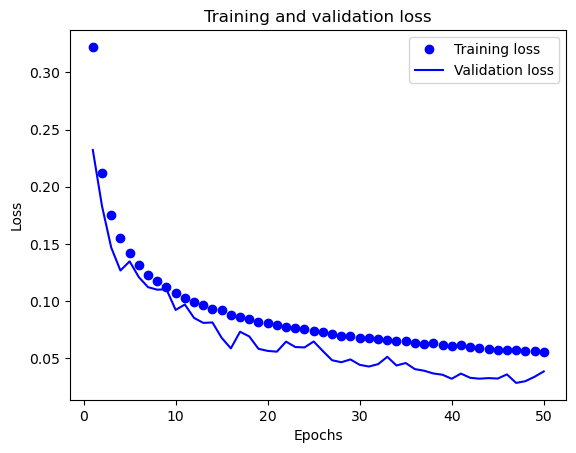

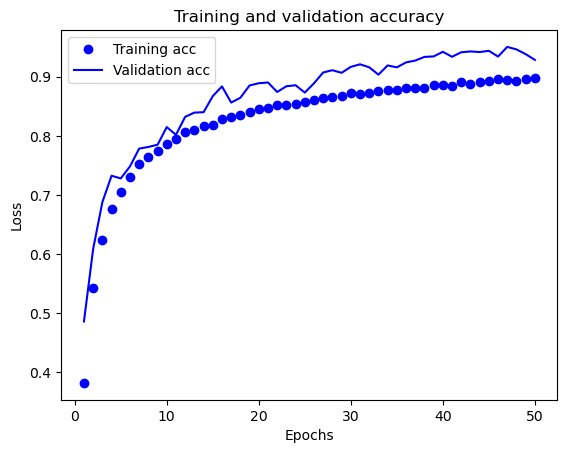

In [7]:
plt.plot(range(1, len(history.history['accuracy']) + 1), history.history['loss'], 'bo', label='Training loss')
plt.plot(range(1, len(history.history['accuracy']) + 1), history.history['val_loss'], 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
val_acc_values = history.history['val_accuracy']
plt.plot(range(1, len(history.history['accuracy']) + 1), history.history['accuracy'], 'bo', label='Training acc')
plt.plot(range(1, len(history.history['accuracy']) + 1), history.history['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [12]:
model.save("CIFAR10v5.h5")


In [14]:
score = model.evaluate(x_test, y_test, verbose=0, batch_size = 50) 
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Test loss: 0.0771540105342865 / Test accuracy: 0.85589998960495
